In [1]:
import numpy as np
from skopt import Optimizer
import matplotlib.pyplot as plt
import copy
import math
from scipy.optimize import curve_fit

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

from matplotlib.colors import Normalize

In [2]:
x_max = 6.4
x_min = 0.0
x_gap = x_max-x_min
y_max = 60.0
y_min = 0.0
y_gap = y_max-y_min
z_min = 160.0
z_max = 200.0
z_gap = z_max-z_min
w_min = 0.0
w_max = 80.0
w_gap = w_max-w_min

In [3]:
x_190 = np.array([2.4,1.0,4.0,1.0,4.0,2.4,2.4,2.5,2.1,1.9,2.2,2.8,2.2,2.2,2.1,1.8])
y_190 = np.array([21.0,10.0,10.0,40.0,40.0,30.0,10.0,10.0,13.0,40.0,10.0,40.0,40.0,20.0,21.0,21.0])
z_190 = np.array([190.0,190.0,190.0,190.0,190.0,190.0,190.0,190.0,190.0,190.0,190.0,190.0,190.0,190.0,190.0,190.0])
w_190 = np.array([55.25,35.54,19.512,44.892,20.68,50.99,52.69,50.64,55.02,45.98,52.03,30.12,46.32,56.16,55.88,48.54])


x_170 = np.array([0.5,1.0,3.2,5.0,6.4,2.3,2.2,0.0,1.6,2.5,1.5,2.0,0.0,1.6,1.65,3.5,3.5,3.4,3.2,2.9,2.9,2.8,2.6,2.4,2.3])
y_170 = np.array([10.0,30.0,30.0,10.0,30.0,30.0,40.0,60.0,0.0,36.0,42.0,43.0,38.0,33.0,34.0,19.0,25.0,15.0,18.0,19.0,20.0,20.0,19.0,21.0,21.0])
z_170 = np.array([170.0,170.0,170.0,170.0,170.0,170.0,170.0,170.0,170.0,170.0,170.0,170.0,170.0,170.0,170.0,170.0,170.0,170.0,170.0,170.0,170.0,170.0,170.0,170.0,170.0])
w_170 = np.array([29.2,47.38,49.97,24.31,23.55,54.9,53.45,10.0,10.0,43.8,53.2,44.2,10.0,53.5,54.1,56.4,54.2,55.1,61.5,62.8,63.0,63.4,63.8,64.8,64.2])

x_temp = np.array([2.4,2.4,2.4,2.4,2.4])
y_temp = np.array([21.0,21.0,21.0,21.0,21.0])
z_temp = np.array([140.0,150.0,160.0,180.0,200.0])
w_temp = np.array([40.25,46.89,50.96,60.22,50.25])


x = np.hstack((x_170,x_190,[2.4,2.4,2.4,2.6,3.3,2.4,3.1,6.4,2.6,2.4,6.4]))
y = np.hstack((y_170,y_190,[21.0,21.0,21.0,19.0,20.0,20.0,21.0,60.0,18.0,18.0,60.0]))
z = np.hstack((z_170,z_190,[180.0,160.0,200.0,174.0,161.0,172.0,176.0,200.0,174.0,173.0,160.0]))
w = np.hstack((w_170,w_190,[60.22,50.96,50.25,63.91,49.18,65.41,61.14,10.0,64.10,65.58,10.0]))

rx = (x-x_min)/x_gap
ry = (y-y_min)/y_gap
rz = (z-z_min)/z_gap
rw = (w-w_min)/w_gap

In [4]:
#Train Gaussian Process Regressor
x_test = np.vstack((np.linspace(0.0,1.0,21),np.full((1,21),21.0/y_max),np.full((1,21),(170.0-z_min)/z_gap))).T
x_train = np.vstack((rx,ry,rz)).T
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel)
gaussian_process.fit(x_train, rw)
gaussian_process.kernel_

0.377**2 * RBF(length_scale=0.127)

In [5]:
#x_170 gaussian process surface

gx_170, gy_170 = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

nx_170 = (gx_170-x_min)/x_gap
ny_170 = (gy_170-y_min)/y_gap

print(nx_170)
print(ny_170)

n = len(nx_170)

predict_170 = np.array([])

for i in range(n):
    input_170 = np.vstack((nx_170[i],ny_170[i],np.full((1,101),(170.0-z_min)/z_gap))).T
    mean_prediction, std_prediction = gaussian_process.predict(input_170, return_std=True)
    if i==0 :
        predict_170 = copy.deepcopy([mean_prediction])
    else:
        predict_170 = np.r_[predict_170,[mean_prediction]]

[[0.   0.01 0.02 ... 0.98 0.99 1.  ]
 [0.   0.01 0.02 ... 0.98 0.99 1.  ]
 [0.   0.01 0.02 ... 0.98 0.99 1.  ]
 ...
 [0.   0.01 0.02 ... 0.98 0.99 1.  ]
 [0.   0.01 0.02 ... 0.98 0.99 1.  ]
 [0.   0.01 0.02 ... 0.98 0.99 1.  ]]
[[0.   0.   0.   ... 0.   0.   0.  ]
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]
 [0.02 0.02 0.02 ... 0.02 0.02 0.02]
 ...
 [0.98 0.98 0.98 ... 0.98 0.98 0.98]
 [0.99 0.99 0.99 ... 0.99 0.99 0.99]
 [1.   1.   1.   ... 1.   1.   1.  ]]


(101, 101)
[2.496, 24.0]


/tmp/ipykernel_47/3400386712.py:13: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 12


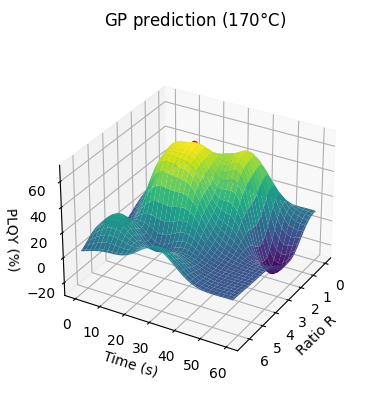

In [6]:
print(predict_170.shape)
max_170_i,max_170_f = np.unravel_index(predict_170.argmax(), predict_170.shape)
print([gx_170[max_170_i][max_170_f],gy_170[max_170_i][max_170_f]])
fig = plt.figure()
plt.tight_layout()
ax = plt.axes(projection='3d')
ax.plot_surface(gx_170,gy_170,(predict_170*w_gap)+w_min,cmap='viridis',alpha = 1.0)
ax.scatter([gx_170[max_170_i][max_170_f]],[gy_170[max_170_i][max_170_f]],[predict_170[max_170_i][max_170_f]*w_gap+w_min],c='r')
ax.set_xlabel('Ratio R')
ax.set_ylabel('Time (s)')
ax.set_zlabel('PLQY (%)')
ax.view_init(elev=30, azim=30)
ax.dist = 12
plt.title('GP prediction '+'('+'170'+r'$\degree$C'+')')
plt.show()

(101, 101)
[2.496, 24.0]


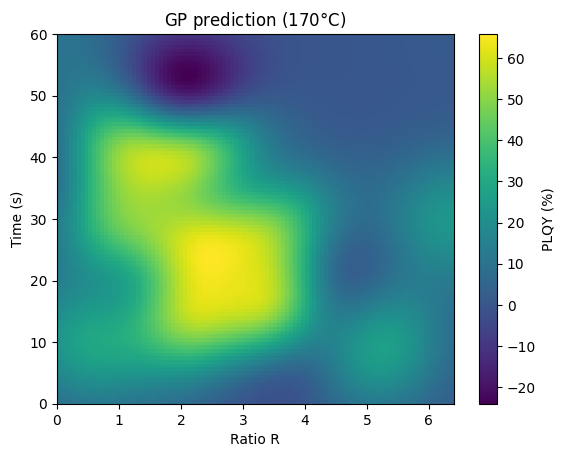

In [7]:
print(predict_170.shape)
max_170_i,max_170_f = np.unravel_index(predict_170.argmax(), predict_170.shape)
print([gx_170[max_170_i][max_170_f],gy_170[max_170_i][max_170_f]])
fig = plt.figure()
surf = plt.imshow((predict_170*w_gap)+w_min, extent = (0,6.4,0,60), origin='lower', cmap='viridis',aspect='auto')
plt.xlabel('Ratio R')
plt.ylabel('Time (s)')
plt.title('GP prediction '+'('+'170'+r'$\degree$C'+')')
cbar = plt.colorbar(surf)
cbar.set_label('PLQY (%)')
plt.show()

In [8]:
gx_190, gy_190 = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

nx_190 = (gx_190-x_min)/x_gap
ny_190 = (gy_190-y_min)/y_gap

print(nx_190)
print(ny_190)

n = len(nx_190)

predict_190 = np.array([])

for i in range(n):
    input_190 = np.vstack((nx_190[i],ny_190[i],np.full((1,101),(190.0-z_min)/z_gap))).T
    mean_prediction, std_prediction = gaussian_process.predict(input_190, return_std=True)
    if i==0 :
        predict_190 = copy.deepcopy([mean_prediction])
    else:
        predict_190 = np.r_[predict_190,[mean_prediction]]

[[0.   0.01 0.02 ... 0.98 0.99 1.  ]
 [0.   0.01 0.02 ... 0.98 0.99 1.  ]
 [0.   0.01 0.02 ... 0.98 0.99 1.  ]
 ...
 [0.   0.01 0.02 ... 0.98 0.99 1.  ]
 [0.   0.01 0.02 ... 0.98 0.99 1.  ]
 [0.   0.01 0.02 ... 0.98 0.99 1.  ]]
[[0.   0.   0.   ... 0.   0.   0.  ]
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]
 [0.02 0.02 0.02 ... 0.02 0.02 0.02]
 ...
 [0.98 0.98 0.98 ... 0.98 0.98 0.98]
 [0.99 0.99 0.99 ... 0.99 0.99 0.99]
 [1.   1.   1.   ... 1.   1.   1.  ]]


[2.176, 25.2]


/tmp/ipykernel_47/2306654393.py:12: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 12


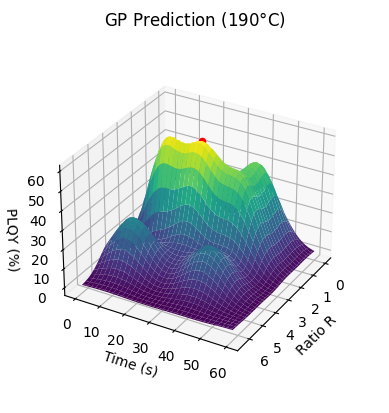

In [9]:
max_190_i,max_190_f = np.unravel_index(predict_190.argmax(), predict_190.shape)
print([gx_190[max_190_i][max_190_f],gy_170[max_190_i][max_190_f]])

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter([gx_190[max_190_i][max_190_f]],[gy_190[max_190_i][max_190_f]],[predict_190[max_190_i][max_190_f]*w_gap+w_min],c='r')
ax.plot_surface(gx_190,gy_190,(predict_190*w_gap)+w_min,cmap='viridis',alpha = 1.0)
ax.set_xlabel('Ratio R')
ax.set_ylabel('Time (s)')
ax.set_zlabel('PLQY (%)')
ax.view_init(elev=30, azim=30)
ax.dist = 12
plt.title('GP Prediction '+'('+'190'+r'$\degree$C'+')')
plt.show()

(101, 101)
[2.496, 24.0]


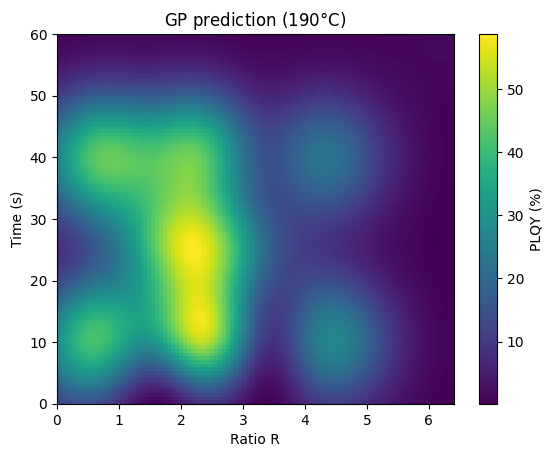

In [10]:
print(predict_190.shape)
max_190_i,max_190_f = np.unravel_index(predict_170.argmax(), predict_170.shape)
print([gx_190[max_190_i][max_190_f],gy_190[max_190_i][max_190_f]])
fig = plt.figure()
surf = plt.imshow((predict_190*w_gap)+w_min, extent = (0,6.4,0,60), origin='lower', cmap='viridis',aspect='auto')
plt.xlabel('Ratio R')
plt.ylabel('Time (s)')
plt.title('GP prediction '+'('+'190'+r'$\degree$C'+')')
cbar = plt.colorbar(surf)
cbar.set_label('PLQY (%)')
plt.show()

In [11]:
gx_173, gy_173 = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

nx_173 = (gx_173-x_min)/x_gap
ny_173 = (gy_173-y_min)/y_gap

print(nx_173)
print(ny_173)

n = len(nx_173)

predict_173 = np.array([])

for i in range(n):
    input_173 = np.vstack((nx_173[i],ny_173[i],np.full((1,101),(173.0-z_min)/z_gap))).T
    mean_prediction, std_prediction = gaussian_process.predict(input_173, return_std=True)
    if i==0 :
        predict_173 = copy.deepcopy([mean_prediction])
    else:
        predict_173 = np.r_[predict_173,[mean_prediction]]

[[0.   0.01 0.02 ... 0.98 0.99 1.  ]
 [0.   0.01 0.02 ... 0.98 0.99 1.  ]
 [0.   0.01 0.02 ... 0.98 0.99 1.  ]
 ...
 [0.   0.01 0.02 ... 0.98 0.99 1.  ]
 [0.   0.01 0.02 ... 0.98 0.99 1.  ]
 [0.   0.01 0.02 ... 0.98 0.99 1.  ]]
[[0.   0.   0.   ... 0.   0.   0.  ]
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]
 [0.02 0.02 0.02 ... 0.02 0.02 0.02]
 ...
 [0.98 0.98 0.98 ... 0.98 0.98 0.98]
 [0.99 0.99 0.99 ... 0.99 0.99 0.99]
 [1.   1.   1.   ... 1.   1.   1.  ]]


/tmp/ipykernel_47/2670169647.py:8: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 12


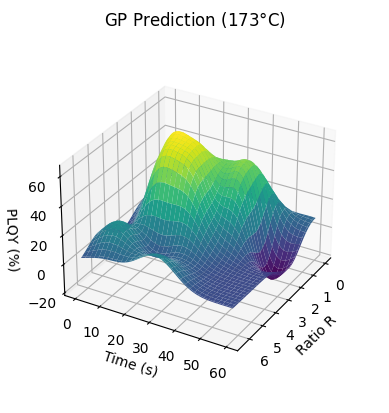

In [12]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(gx_173,gy_173,(predict_173*w_gap)+w_min,cmap='viridis',alpha = 1)
ax.set_xlabel('Ratio R')
ax.set_ylabel('Time (s)')
ax.set_zlabel('PLQY (%)')
ax.view_init(elev=30, azim=30)
ax.dist = 12
plt.title('GP Prediction '+'('+'173'+r'$\degree$C'+')')
plt.show()

[29.2, 47.38, 49.97, 49.97, 49.97, 54.9, 54.9, 54.9, 54.9, 54.9, 54.9, 54.9, 54.9, 54.9, 54.9, 56.4, 56.4, 56.4, 61.5, 62.8, 63.0, 63.4, 63.8, 64.8, 64.8]


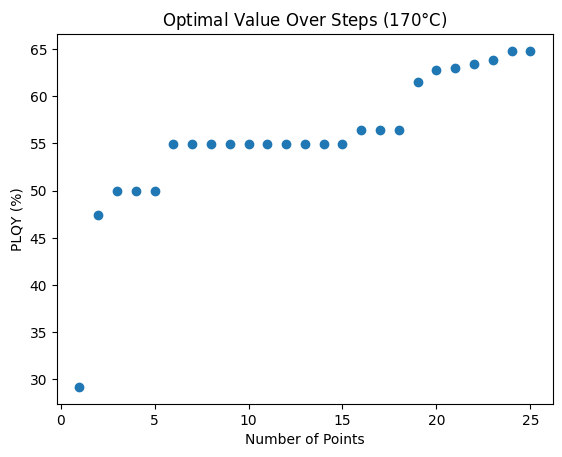

In [13]:
n_170 = len(x_170)
max_170 = [max(w_170[0:i+1]) for i in range(n_170)]
print(max_170)
plt.plot([i+1 for i in range(n_170)],max_170,'o')
plt.xlabel('Number of Points')
plt.ylabel('PLQY (%)')
plt.title('Optimal Value Over Steps '+'('+'170'+r'$\degree$C'+')')
plt.show()

[55.25, 55.25, 55.25, 55.25, 55.25, 55.25, 55.25, 55.25, 55.25, 55.25, 55.25, 55.25, 55.25, 56.16, 56.16, 56.16]


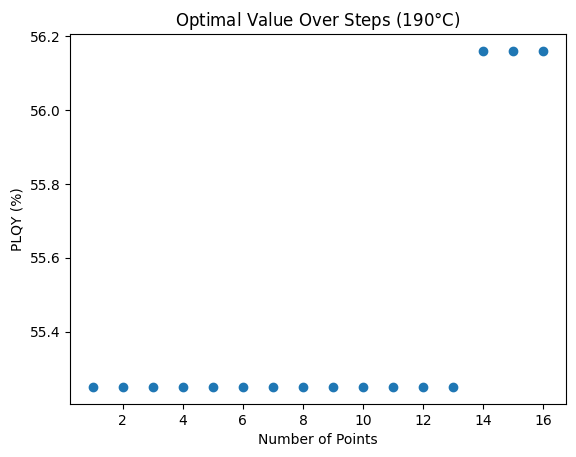

In [14]:
n_190 = len(x_190)
max_190 = [max(w_190[0:i+1]) for i in range(n_190)]
print(max_190)
plt.plot([i+1 for i in range(n_190)],max_190,'o')
plt.xlabel('Number of Points')
plt.ylabel('PLQY (%)')
plt.title('Optimal Value Over Steps '+'('+'190'+r'$\degree$C'+')')
plt.show()

/tmp/ipykernel_47/1434839442.py:14: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 12


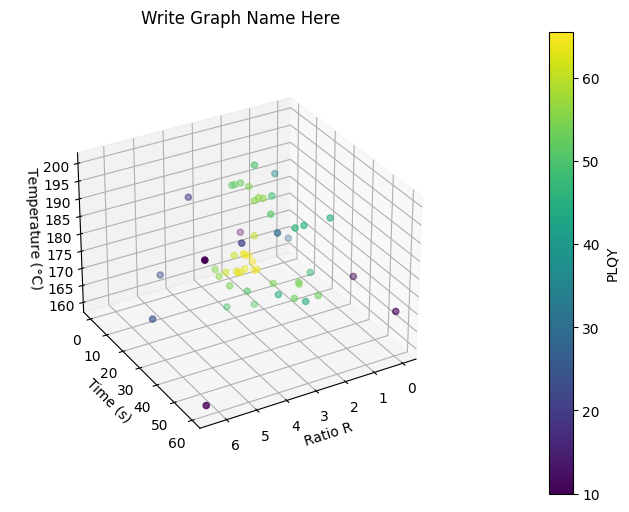

In [15]:

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(x, y, z, c=w, marker='o')

cbar = plt.colorbar(scatter)
cbar.set_label('PLQY')
ax.view_init(elev=30,azim=60)

ax.set_xlabel('Ratio R')
ax.set_ylabel('Time (s)')
ax.set_zlabel('Temperature '+'('+r'$\degree$C'+')')

ax.dist = 12
plt.title('Write Graph Name Here')
plt.show()